Text(0.5, 1.0, 'horsepower bins')

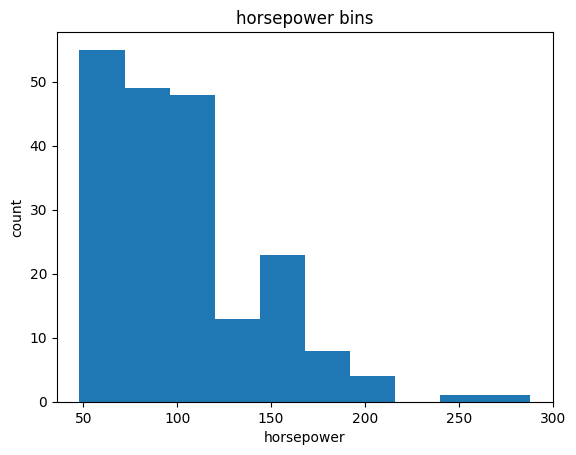

In [2]:
import pandas as pd
import numpy as np

path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/auto.csv"



headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
df = pd.read_csv(path);
df.columns = headers
#df.head(5)
df['fuel-type']
df.replace("?", np.nan, inplace = True) 
 
df["horsepower"]=df["horsepower"].astype('float', copy=True) 
df
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")




Text(0.5, 1.0, 'horsepower bins')

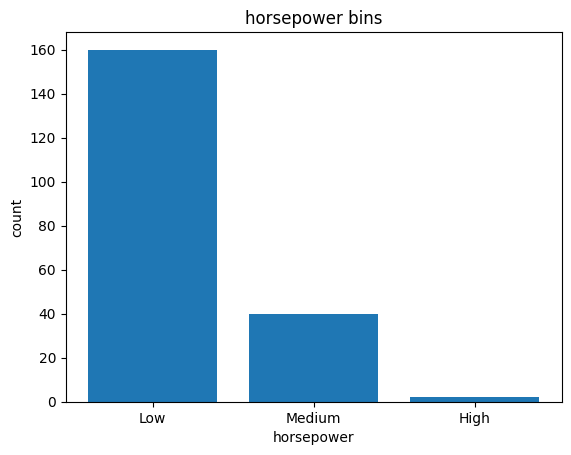

In [85]:
bins = np.linspace(min(df["horsepower"]), max(df["horsepower"]),4)
group_names = ['Low', 'Medium', 'High']

df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True )
df[['horsepower','horsepower-binned']].head(20)
df["horsepower-binned"].value_counts()

%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

 

In [3]:
dummy_variable_1 = pd.get_dummies(df["fuel-type"])
dummy_variable_1.rename(columns={'gas':'fuel-type-gas', 'diesel':'fuel-type-diesel'}, inplace=True)
# merge data frame "df" and "dummy_variable_1" 
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
df.drop("fuel-type", axis = 1, inplace=True)
dummy_variable_1.head()



,fuel-type-diesel,fuel-type-gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [103]:
df

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas
0,3,?,alfa-romero,std,two,convertible,rwd,front,88.6,168.8,...,3.47,2.68,9.0,111,5000,21,27,16500,0,1
1,1,?,alfa-romero,std,two,hatchback,rwd,front,94.5,171.2,...,2.68,3.47,9.0,154,5000,19,26,16500,0,1
2,2,164,audi,std,four,sedan,fwd,front,99.8,176.6,...,3.19,3.40,10.0,102,5500,24,30,13950,0,1
3,2,164,audi,std,four,sedan,4wd,front,99.4,176.6,...,3.19,3.40,8.0,115,5500,18,22,17450,0,1
4,2,?,audi,std,two,sedan,fwd,front,99.8,177.3,...,3.19,3.40,8.5,110,5500,19,25,15250,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,9.5,114,5400,23,28,16845,0,1
200,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.78,3.15,8.7,160,5300,19,25,19045,0,1
201,-1,95,volvo,std,four,sedan,rwd,front,109.1,188.8,...,3.58,2.87,8.8,134,5500,18,23,21485,0,1
202,-1,95,volvo,turbo,four,sedan,rwd,front,109.1,188.8,...,3.01,3.40,23.0,106,4800,26,27,22470,1,0


In [3]:
# get indicator variables of aspiration and assign it to data frame "dummy_variable_2"
dummy_variable_2 = pd.get_dummies(df['aspiration'])

# change column names for clarity
dummy_variable_2.rename(columns={'std':'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)

# show first 5 instances of data frame "dummy_variable_1"
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [4]:
# merge the new dataframe to the original datafram
df = pd.concat([df, dummy_variable_2], axis=1)

# drop original column "aspiration" from "df"
df.drop('aspiration', axis = 1, inplace=True)


In [107]:
df

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,peak-rpm,city-mpg,highway-mpg,price,fuel-type-diesel,fuel-type-gas,aspiration-std,aspiration-turbo,aspiration-std,aspiration-turbo
0,3,?,alfa-romero,two,convertible,rwd,front,88.6,168.8,64.1,...,5000,21,27,16500,0,1,1,0,1,0
1,1,?,alfa-romero,two,hatchback,rwd,front,94.5,171.2,65.5,...,5000,19,26,16500,0,1,1,0,1,0
2,2,164,audi,four,sedan,fwd,front,99.8,176.6,66.2,...,5500,24,30,13950,0,1,1,0,1,0
3,2,164,audi,four,sedan,4wd,front,99.4,176.6,66.4,...,5500,18,22,17450,0,1,1,0,1,0
4,2,?,audi,two,sedan,fwd,front,99.8,177.3,66.3,...,5500,19,25,15250,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,...,5400,23,28,16845,0,1,1,0,1,0
200,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.8,...,5300,19,25,19045,0,1,0,1,0,1
201,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,...,5500,18,23,21485,0,1,1,0,1,0
202,-1,95,volvo,four,sedan,rwd,front,109.1,188.8,68.9,...,4800,26,27,22470,1,0,0,1,0,1


In [111]:
df.to_csv('clean_df.csv')